# Import Package

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score

# Record File "players_fifa"

In [2]:
df = pd.read_csv('players_fifa.csv')
df.head()

,team,number,position,birth_date,shirt_name,club,height,weight,league,age,name,caps
0,Argentina,1,GK,1986-02-10,GUZMÁN,Tigres UANL,192,90,MEX,32.339726,Nahuel Guzmán,6
1,Argentina,2,DF,1987-03-18,MERCADO,Sevilla FC,181,81,ESP,31.241096,Gabriel Mercado,20
2,Argentina,3,DF,1992-08-31,TAGLIAFICO,AFC Ajax,169,65,NED,25.786301,Nicolás Tagliafico,4
3,Argentina,4,DF,1986-09-20,ANSALDI,Torino FC,181,73,ITA,31.731507,Cristian Ansaldi,5
4,Argentina,5,MF,1986-01-30,BIGLIA,AC Milan,175,73,ITA,32.369863,Lucas Biglia,57


# Deskripsi Data

In [3]:
df.describe()

,number,height,weight,age,caps
count,736.00000,736.000000,736.000000,736.000000,736.000000
mean,12.00000,182.407609,77.188859,27.894286,35.328804
std,6.63776,6.930924,7.233778,3.915969,31.932080
min,1.00000,165.000000,59.000000,19.441096,0.000000
25%,6.00000,178.000000,72.000000,25.221233,10.000000
50%,12.00000,183.000000,77.000000,27.719178,25.000000
75%,18.00000,187.000000,82.000000,30.729452,52.000000
max,23.00000,201.000000,99.000000,45.410959,158.000000


# Data Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   team        736 non-null    object 
 1   number      736 non-null    int64  
 2   position    736 non-null    object 
 3   birth_date  736 non-null    object 
 4   shirt_name  736 non-null    object 
 5   club        736 non-null    object 
 6   height      736 non-null    int64  
 7   weight      736 non-null    int64  
 8   league      736 non-null    object 
 9   age         736 non-null    float64
 10  name        736 non-null    object 
 11  caps        736 non-null    int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 69.1+ KB


# Korelasi Data

In [5]:
df.corr()

C:\Users\Asus\AppData\Local\Temp\ipykernel_76664\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,number,height,weight,age,caps
number,1.000000,-0.098272,-0.105464,-0.159885,-0.210753
height,-0.098272,1.000000,0.772074,0.062997,-0.068775
weight,-0.105464,0.772074,1.000000,0.172662,0.015446
age,-0.159885,0.062997,0.172662,1.000000,0.604073
caps,-0.210753,-0.068775,0.015446,0.604073,1.000000


In [6]:
df.isna().sum()

team          0
number        0
position      0
birth_date    0
shirt_name    0
club          0
height        0
weight        0
league        0
age           0
name          0
caps          0
dtype: int64

# Exploratory Data Analysis

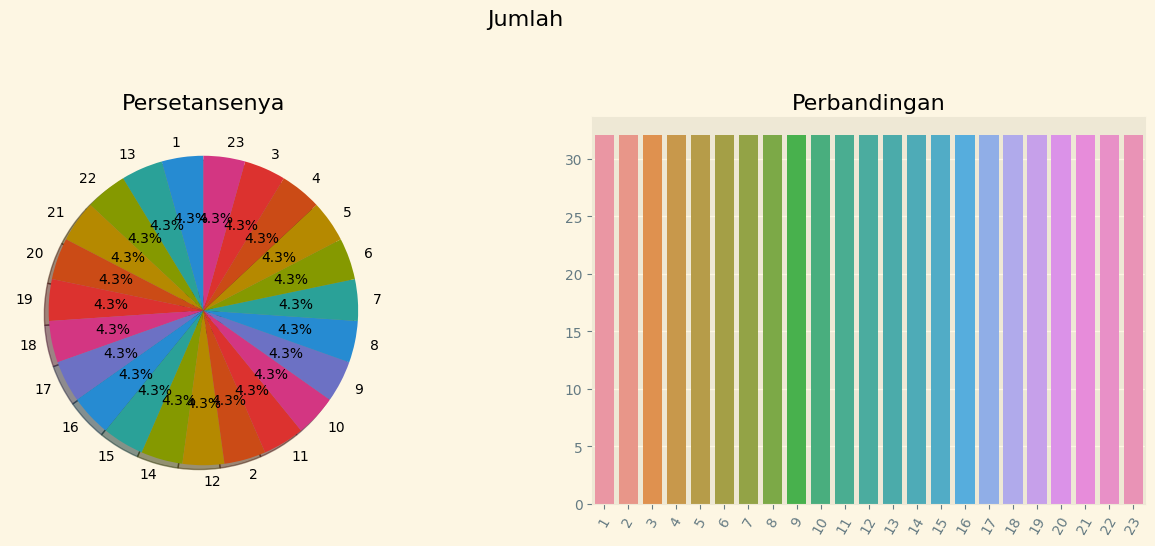

In [11]:
plt.style.use('Solarize_Light2')

Kategori = df["number"].value_counts().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(14,6))
fig.tight_layout(pad=5.0)

ax[0].pie(Kategori['number'],labels=Kategori['index'],startangle=90,autopct='%.1f%%',shadow=True)
ax[0].title.set_text("Persetansenya")


X_index = list(Kategori['index'])
y_species = list(Kategori['number'])
sns.barplot(x=X_index,y=y_species,ax=ax[1])
ax[1].title.set_text("Perbandingan")

fig.subplots_adjust(top=0.8)
plt.xticks(rotation=60)
plt.suptitle("Jumlah",size=16)
plt.show()

<Figure size 2000x1500 with 0 Axes>

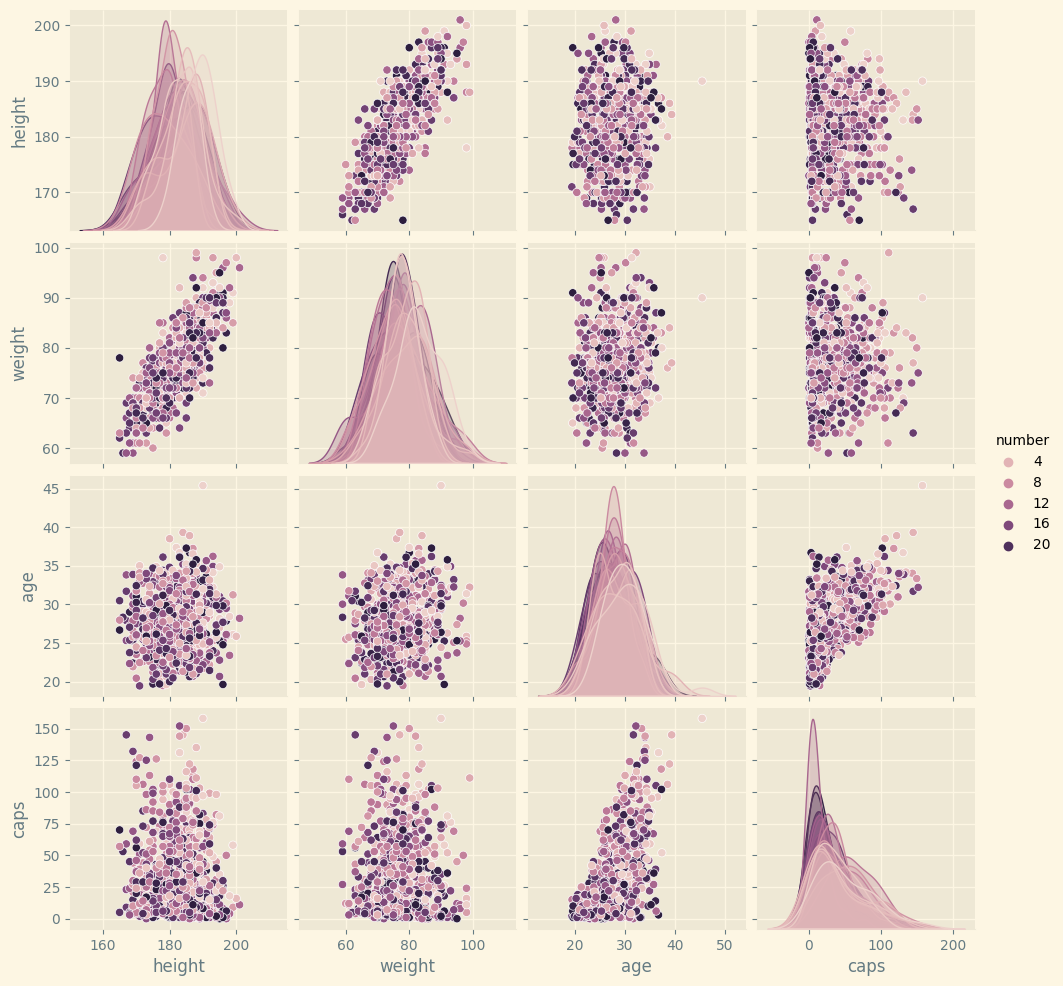

In [12]:
plt.figure(figsize=(20,15))
sns.pairplot(df,hue="number")
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_76664\1959546022.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='cividis',annot=True,annot_kws={"size":15})


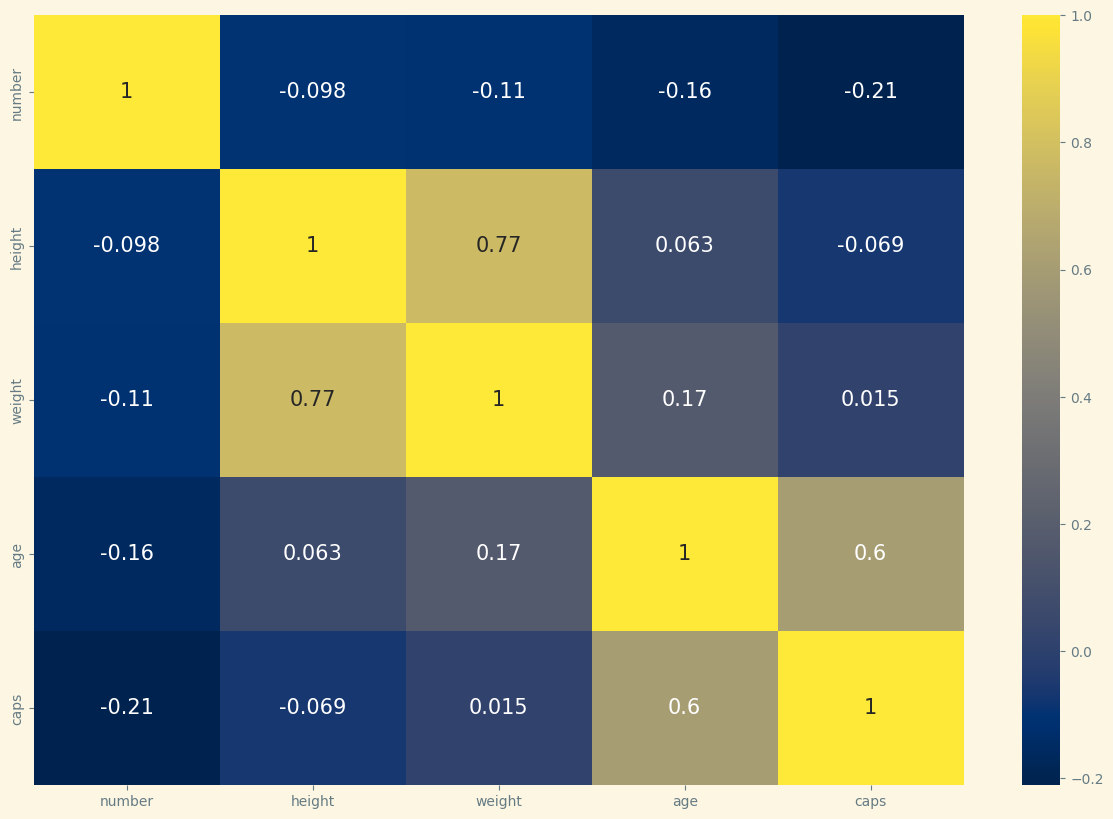

In [13]:
plt.figure(figsize=(15,10))

sns.heatmap(df.corr(),cmap='cividis',annot=True,annot_kws={"size":15})
plt.show()

# Klasisfikasi Data
Klasifikasi digunakan ketika variabel keluaran (output) adalah categorical. Klasifikasi digunakan ketika variabel keluaran (output) adalah categorical.

# Split Data

In [41]:
data = df[['number','height','weight','age','caps']]
label = df[['number']]

data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=.2)

# K-Nearest Neighbour (KNN)
K-Nearest Neighbour atau algoritma KNN menggunakan algoritma non-parametrik yang mengelompokkan poin data berdasarkan kedekatan dan juga asosiasi mereka dengan data lain. Algoritma KNN mengasumsikan bahwa
titik data yang serupa akan selalu bisa
ditemukan di sekitarnya.

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(data_train,label_train)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [16]:
predict_label = knn.predict(data_test)

In [17]:
akurasi = accuracy_score(label_test, predict_label)

In [18]:
print("Akurasi algoritma KNN dengan default paramater :", {akurasi})

Akurasi algoritma KNN dengan default paramater : {0.16216216216216217}


# Decision Tree
Decision Tree adalah sebuah tipe model yang digunakan untuk Supervised Learning. Decision Tree dapat digunakan untuk menyelesaikan masalah klasifikasi dan regresi, namun lebih sering digunakan untuk masalah klasifikasi. Decision Tree memiliki bentuk seperti pohon, dimana tree memiliki node akar (root node), decision node dan node daun (leaf node). Leaf node adalah node akhir yang tidak dapat dipecah dan yang akan menentukan hasil prediksi decision tree.

In [21]:
dt = DecisionTreeClassifier()
dt.fit(data_train, label_train)

DecisionTreeClassifier()

In [22]:
predict_label = dt.predict(data_test)

In [23]:
akurasi = accuracy_score(label_test, predict_label)

In [24]:
print("Akurasi algoritma Decision Tree dengan default paramater :", {akurasi})

Akurasi algoritma Decision Tree dengan default paramater : {1.0}


# Naive Bayes
Naïve Bayes, yang mengadopsi prinsip kemandirian kelas bersyarat dari Teorema Bayes. Dalam prinsip tersebut, ada tidaknya satu elemen tidak akan memengaruhi komponen lain dalam probabilitas hasil yang akan diberikan, dengan predictor yang mendapatkan efek yang sama.

In [25]:
gnb  = GaussianNB()
gnb.fit(data_train,label_train)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [26]:
predict_label = gnb.predict(data_test)

In [27]:
akurasi = accuracy_score(label_test, predict_label)

In [28]:
print("Akurasi algoritma Naive Bayes dengan default paramater :", {akurasi})

Akurasi algoritma Naive Bayes dengan default paramater : {1.0}


# Support Vector Machine (SVM)
Support Vector Machine atau sering disingkat SVM merupakan metode algoritma Supervised Learning yang dikembangkan oleh Vladimir Vapnik. Metode ini biasanya digunakan dalam data classification dan juga regression. Metode Support Vector Machine sering dimanfaatkan dalam masalah klasifikasi serta pembangunan hyperplane atau batas keputusan yang memisahkan kelas-kelas titik data.

In [29]:
svc = SVC()
svc.fit(data_train,label_train)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [30]:
predict_label = svc.predict(data_test)

In [31]:
akurasi = accuracy_score(label_test, predict_label)

In [32]:
print("Akurasi algoritma SVC dengan default paramater :", {akurasi})

Akurasi algoritma SVC dengan default paramater : {0.0472972972972973}


# Regresi data
Regresi digunakan ketika variabel keluaran (output) bernilai real atau kontinyu. Pada kasus ini, terdapat hubungan antara dua variabel atau lebih misalnya suatu variabel berubah apabila ada perubahan dengan variabel lainnya.

In [36]:
data, label = datasets.load_diabetes(return_X_y=True)
data = data[:, np.newaxis, 2]

data_train2 = data[:-50]
data_test2 = data[-50:]

label_train2 = label[:-50]
label_test2 = label[-50:]

# Linear regresion
Regresi digunakan ketika variabel keluaran (output) bernilai real atau kontinyu. Pada kasus ini, terdapat hubungan antara dua variabel atau lebih misalnya suatu variabel berubah apabila ada perubahan dengan variabel lainnya.

In [38]:
reg = LinearRegression()
reg.fit(data_train2,label_train2)

LinearRegression()

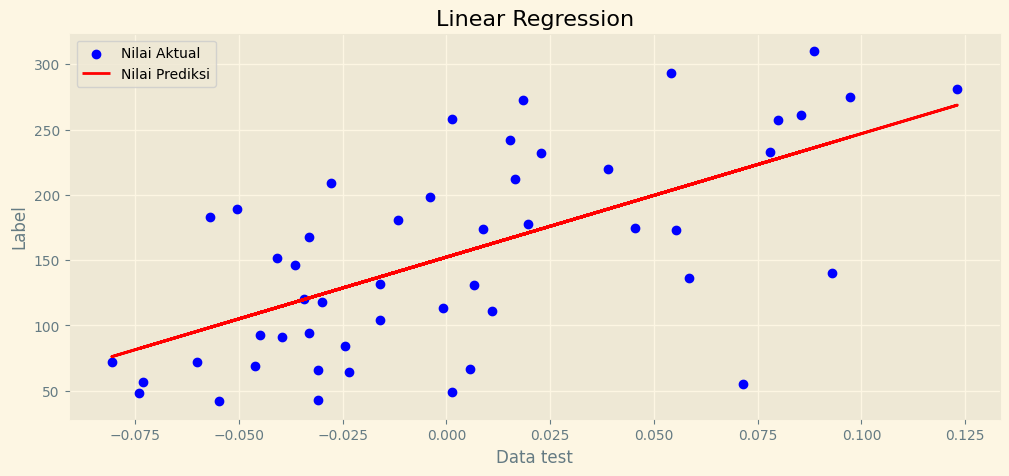

In [42]:
predict_label = reg.predict(data_test2)

plt.figure(figsize=(12,5))

plt.scatter(data_test2, label_test2, color="blue",label="Nilai Aktual")
plt.plot(data_test2, predict_label, color="red",label="Nilai Prediksi")
plt.title('Linear Regression')
plt.xlabel('Data test')
plt.ylabel('Label')
plt.legend(loc ='upper left')
plt.show()